<a href="https://colab.research.google.com/github/guilhermeterenciani/fecigran2023/blob/main/Curso_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão

A tarefa de **regressão** consiste em predizer **valores** para determinados **objetos**. Vamos contextualizar de maneira operacional esses objetos e valores através de seus tipos de variáveis: em geral um valor é um número real <code>(float)</code> ou um inteiro <code>(int)</code>; já o objeto a ser regredido pode ser um **vetor de features** - aqui vetor tem o mesmo sentido de uma variável lista <code>(lst)</code> ou uma tupla <code>(tuple)</code>.

Diferentes **algoritmos de regressão** podem ser usados para realizar essa tarefa de, dada uma entrada, gerar uma saída (valor predito para aquele objeto).

Define-se a regressão como uma tarefa de **aprendizado de máquina supervisionado**, isto é, os algoritmos de regressão precisam ser treinados com pares objeto-valor tidos como associações corretas. Somente após o treinamento é que o algoritmo de regressão estará apto a predizer valores para novas entradas (das quais não se sabe o valor a princípio) - diz-se que  algoritmo aprendeu o padrão nos dados de treinamento e agora pode ser usado para predizr o valor de saída para novas entradas.

-----------------------------------------------

In [82]:
import pandas as pd
import numpy as np

# Criando dados para o treinamento do algoritmo

In [83]:
#Criamos uma função que será a função para criar os dados que queremos predizer
def f(x):
    return x*4 + 2

In [84]:
# Criamos um vetor chamado x que está com números de 0 à 99
x = np.arange(0,100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [85]:
#Biblioteca matplotlib será utilizada para mostrarmos gráficos para entender melhor nossa entrada
import matplotlib.pyplot as plt

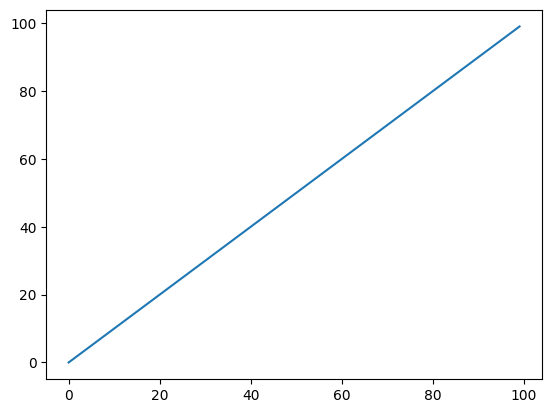

In [86]:
# função plot recebe um parâmetro para mostrar os dados da variável x
plt.plot(x)

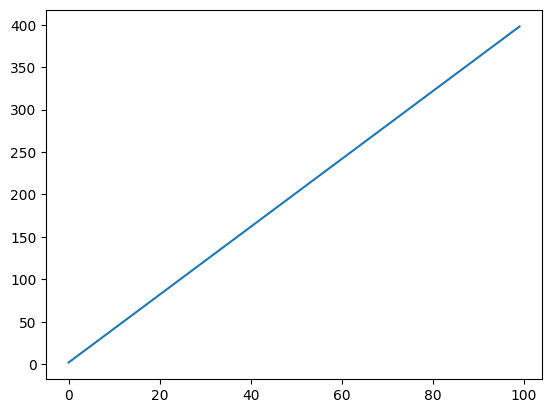

In [87]:
#Se mostrarmos os pontos da nossa função f para o nosso vetor de pontos x temos o seguinte gráfico
plt.plot(x,f(x))

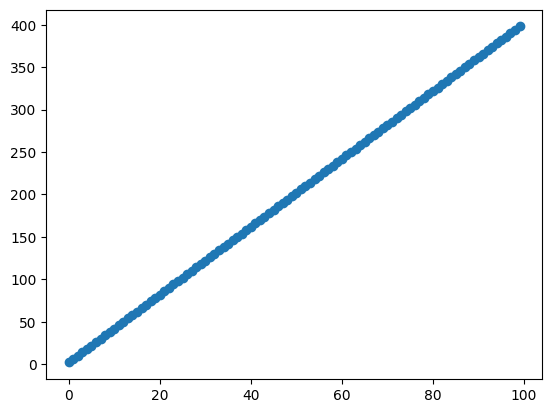

In [88]:
#Para mostrarmos o gráfico como pontos podemos utilizar a função scatter
plt.scatter(x,f(x))

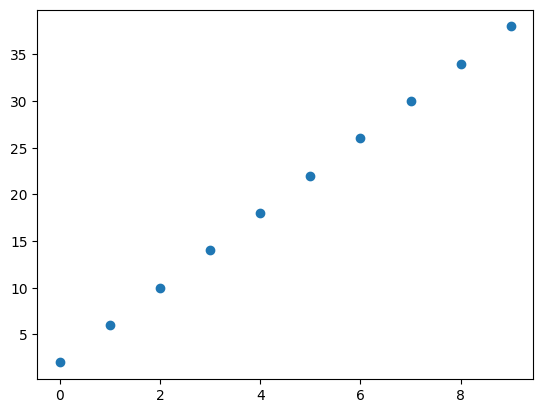

In [89]:
#Podemos mostrar apenas uma fatia dos nossos dados utilizando o conceito de slice do numpy
plt.scatter(x[:10],f(x[:10]))

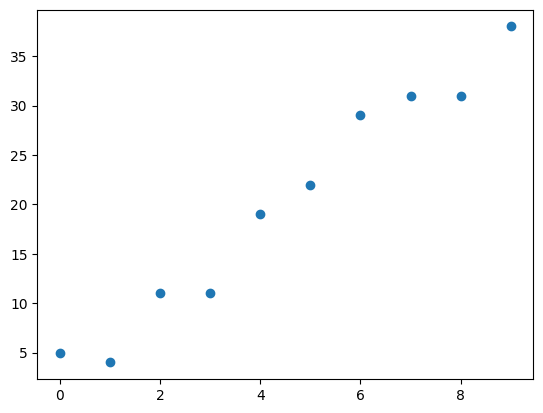

In [90]:
#Só que a vida não é tão fácil, queremos dificultar nossa vida adicionando um pouco de ruído no nossos dados.

#Para isso em cada ponto, vamos criar um número sorteado e somar com o ponto da função verdadeiro
#Para fazer algo nesse sentido:

#ex:
plt.scatter(x[:10],[f(x[0])+3,f(x[1])-2,f(x[2])+1,f(x[3])-3,f(x[4])+1,f(x[5]),f(x[6])+3,f(x[7])+1,f(x[8])-3,f(x[9])])

In [91]:
# a função da biblioteca numpy np.random.randn(100) é utilizada para criar n números aleatórios
np.random.randn(100)

array([-6.86485712e-01,  8.19806505e-01, -3.65811411e-01, -1.92594885e+00,
       -6.15595547e-01, -2.33740119e-01,  4.21074262e-01,  7.27170920e-01,
        6.61916227e-01, -1.04986265e+00,  1.87862264e+00,  6.36533415e-01,
        2.39010959e+00, -5.82550274e-01,  2.44602615e-01, -1.67684399e+00,
       -4.65745394e-01, -7.30649629e-01, -3.16133417e-01,  6.06332780e-01,
       -4.78497641e-02,  1.46868498e+00,  5.05273327e-01, -6.22219689e-01,
       -1.22728599e+00, -5.49248940e-01, -4.37484189e-01,  1.65038812e-03,
        3.73200725e-01,  8.60403566e-01,  3.21169852e-01, -1.83743602e+00,
        3.37345965e-01, -1.83091014e+00,  1.68321482e-01, -3.64935811e-01,
       -1.43802823e-01, -1.72148741e+00, -1.46228939e+00,  3.28101754e-01,
        9.25690941e-01,  1.28599750e-01, -1.29574893e+00,  7.36883740e-01,
       -1.72390741e+00,  1.22459700e-01,  7.03463841e-01, -1.00253810e-01,
        7.31972105e-01, -1.07088684e+00,  1.72751664e-01, -1.12167963e-01,
        4.12344232e-01,  

In [92]:
#A média dessa função é próximo a zero
np.random.randn(100).mean()

-0.16033536298823678

In [93]:
#E o desvio padrão é próximo a 1
np.random.randn(100).std()

0.919814340038626

In [94]:
#Podemos multiplicar os números aleatórios por um número para aumentar o erro da função:
np.random.randn(100)*5.0

array([  0.32417684,  -4.35107421,   2.41722689,  -2.39273904,
         0.97151367,   0.48231965,   0.78501306,   6.0019954 ,
         2.66279785,  -4.83705988,  -0.59184114,   1.58508141,
         5.6037053 ,  -0.22371774,   8.27006763,   0.33968307,
         2.26957935,  10.36611801,  -5.40354012,   1.99301537,
         1.29356199,   8.08972608,  -3.08487292,   1.20269386,
         2.51055174,  -7.18486099,  -2.26282511,  -0.1905538 ,
         2.52968527,  -2.39858321,  -0.70444253,   7.90360461,
        -3.12537576,  -1.53156088,   1.45100383,   5.23739003,
         2.14524633,   4.15883537,   2.64897599,   9.70537023,
        -8.80996433,   5.20743297,   3.58266405,  -1.61162772,
         2.19949746,   4.24330246,  -1.93330369,   0.84938496,
        -1.99955479,   1.97371102,   1.67113409,   7.71941527,
         3.64558963,   8.23788894, -11.24746388,   9.31971157,
         3.08987143,  -3.27435705,   0.59302226,  -1.32766263,
        -8.40287326,  -0.10913221,   0.45252386,  -0.02

In [95]:
#Então podemos adicionar um erro qualquer na função f para não ser tão simples de responder
y = f(x) + np.random.randn(100)*5.0

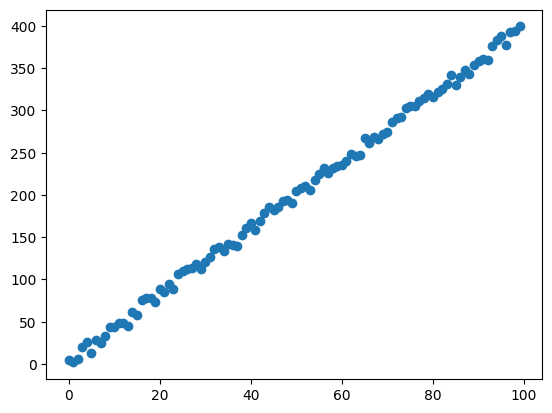

In [96]:
plt.scatter(x,y)

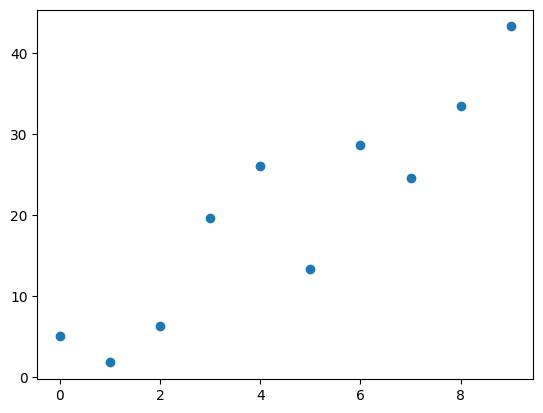

In [97]:
plt.scatter(x[:10],y[:10])

In [98]:
#Salvamos esses dados em um arquivo chamado dataset.csv dentro da pasta sample_data
f = open("sample_data/dataset.csv","wt")
f.write("x,y\n");
for i in range(100):
    f.write(f'{x[i]},{y[i]}\n')
f.close()

In [99]:
#Assim temos nosso primeiro dataset que será utilizado para treinamento dos nossos algoritmos inteligentes

# Recuperando dados de um dataset criado anteriormente

In [100]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv",header=None)

In [101]:
data_numpy = data.to_numpy()

In [102]:
y_train = data_numpy[:,0]
x_train = data_numpy[:,1:]

In [103]:
28*28

784

In [104]:
x_train[0].reshape(28,28).shape

(28, 28)

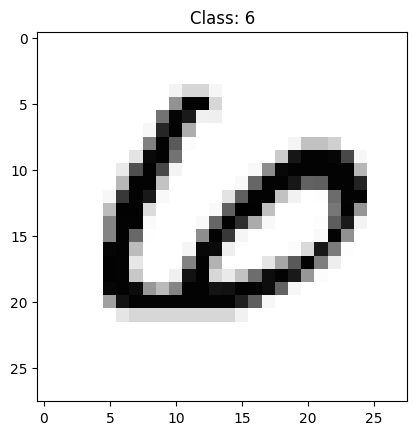

In [105]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28),cmap='Greys')
plt.title("Class: %d"%y_train[0])
plt.show()

In [106]:
#Para recuperar os dados de um dataset utilizado anteriormente podemos utilizar a biblioteca pandas
import pandas as pd

In [107]:
#Utilizamos a função read_csv para ler os dados do arquivo de uma forma simplificada
data = pd.read_csv("sample_data/dataset.csv")

In [108]:
#A função read_csv retorna um objeto chamado de DATAFRAME
#Com o dataframe podemos pegar as colunas dos nossos dados
#Também temos a função head para visualizar o começo do nosso dataframe
data.head()

,x,y
0,0,5.029812
1,1,1.784243
2,2,6.277040
3,3,19.646485
4,4,26.020513


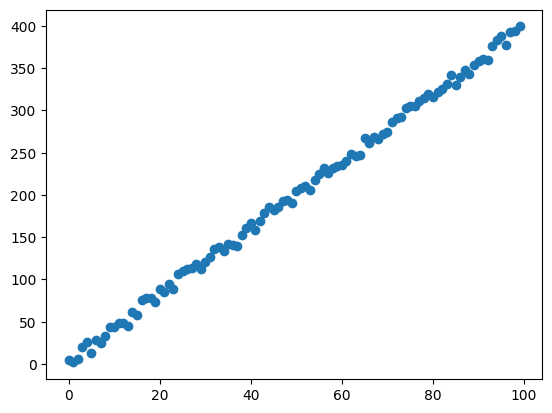

In [109]:
#Podemos "Plotar" o gráfico novamente apenas para visualizar os dados que vem do arquivo
plt.scatter(data["x"],data["y"])

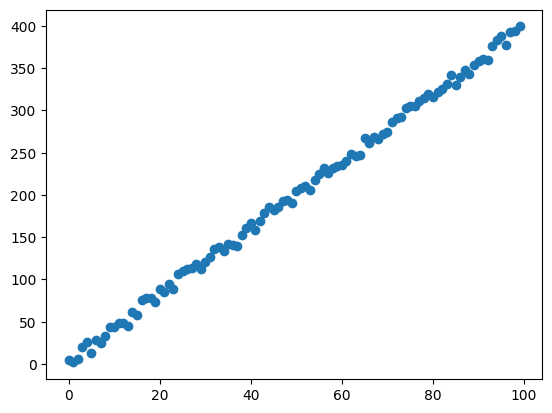

In [110]:
#Podemos visualizar que mudou um pouquinho a forma como acessamos os dados das linhas
#Entretando, nada tão grave a ponto de dificultar nossas vidas.
#Uma funçãozinha muito legal para conseguimos fazer o slice pelos dados é a função iloc do dataframe
#Assim, podemos acessar muito parecido com o numpy
plt.scatter(data.iloc[:,0],data.iloc[:,1])


#Como predizer o valor da coluna y sem ter conhecimento da função que gera ela?

In [111]:
#Podemos observar pelo gráfico acima que a função é uma reta.

Função da reta:

y = aX + b

In [112]:
#Se fixarmos o valor de a e b temos:
a = 5
b=1

In [113]:
#Podemos também tentar predizer os pontos a partir dessa reta que criamos
#Criando um vetor de pontos com os coeficiêntes da reta que fixamos:

y_hat = a*data.iloc[:,0] + b

Vamos plotar as duas funções para ver como elas estão e se estão próximas?

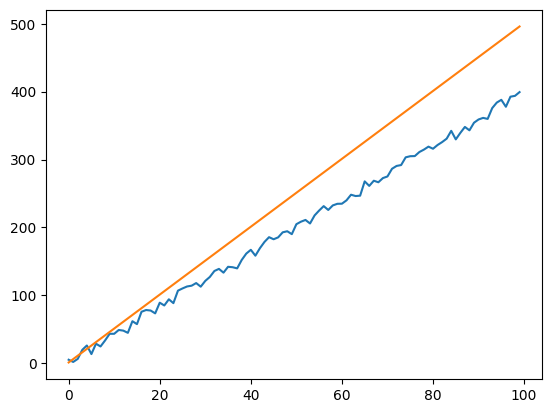

In [114]:
plt.plot(data.iloc[:,0],y,y_hat)

Podemos observar que nosso chute foi até bom, mas como saber o quão errado estamos?

E só para exercício, qual seria o valor de **a** e **b** ideal?

# Loss Function

A função de perda é a função que calcula a distância entre a saída atual do algoritmo e a saída esperada.

In [115]:
#Qual é a distância do ponto da função que criamos para a real? Qual o erro?

In [116]:
y[:10]-y_hat[:10]

0     4.029812
1    -4.215757
2    -4.722960
3     3.646485
4     5.020513
5   -12.626061
6    -2.349163
7   -11.411342
8    -7.556860
9    -2.751391
Name: x, dtype: float64

In [117]:
#Como o erro pode ser positivo e negativo, se somarmos tudo não teremos o valor real do erro
#Mas podemos elevar ao quadrado o erro para tirar o sinal negativo e passar a raiz quadrada
#Ex:
np.power(y[:10]-y_hat[:10],2).mean()

45.46517526750325

Por sorte, não precisamos ficar reinventando a roda.
Podemos utilizar a biblioteca sklearn para realizar o cálculo do erro para nós.

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[:10],y_hat[:10])

45.46517526750325

In [119]:
#Calculando o erro para todos os nossos dados:
mean_squared_error(y,y_hat)

3359.530590655316

Parece que nossa função não é muito boa para retornar as predições corretas 😞😞😞😞

#Utilizando inteligência artificial para treinar e responder qual é o melhor parâmetro para nossos coeficiêntes.

In [120]:
#Importando um regressor linear para predizer os coêficientes da reta.
from sklearn.linear_model import LinearRegression

In [121]:
# Já temos o x e y que obtivemos anteriormente:
x,y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([  5.02981224,   1.78424344,   6.27703952,  19.64648542,
         26.02051261,  13.37393853,  28.65083731,  24.58865791,
         33.44314032,  43.24860867,  43.26078506,  48.87068478,
         47.93051606,  44.66286173,  61.80215252,  57.49022181,
         75.72725396,  78.26755464,  77.53714736,  73.33094766,
         89.0658466 ,  84.98649194,  94.06844871,  88.41979247,
        106.8181365 , 110.07452068, 112.96898835, 114.13187932,
        117.99753226, 112.67558559, 121.19133565, 127.01115114,
        135.78046636, 138.87938288, 13

## Qual o problema de utilizar todos os dados de x e y para treinar o algoritmo?



In [122]:
linearRegression = LinearRegression()


In [123]:
x.shape,y.shape

((100,), (100,))

In [124]:
#Qual o problema que dá usarmos desse jeito???
#linearRegression.fit(x,y)

In [125]:
#Esse shape indica que o x é um vetor de 100 posições mas o regressor linear espera que o x seja uma matriz
x.shape

(100,)

In [126]:
#
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [127]:
#Usamos a função reshape para criar uma matriz de 100 linhas por 1 coluna.
x.reshape(100,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [128]:
# como não precisamos saber quantas linhas o x terá, podemos utilizar o valor -1 para colocar quantas forem necessárias.
x.reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [129]:
#Por fim, criamos o regressor linear com os valores de x e y.
linearRegression.fit(x.reshape(-1,1),y)

LinearRegression()

In [130]:
# O algoritmo foi capaz de aprender os parâmetros ideais para a reta, agora podemos analisar o coeficiente angular e o ponto de intersecção da mesma.

linearRegression.coef_

array([3.95280301])

In [131]:
linearRegression.intercept_

3.64305714291973

In [132]:
y_predito = linearRegression.coef_*x + linearRegression.intercept_
y_predito

array([  3.64305714,   7.59586015,  11.54866316,  15.50146617,
        19.45426918,  23.40707218,  27.35987519,  31.3126782 ,
        35.26548121,  39.21828422,  43.17108722,  47.12389023,
        51.07669324,  55.02949625,  58.98229926,  62.93510226,
        66.88790527,  70.84070828,  74.79351129,  78.7463143 ,
        82.6991173 ,  86.65192031,  90.60472332,  94.55752633,
        98.51032934, 102.46313234, 106.41593535, 110.36873836,
       114.32154137, 118.27434438, 122.22714738, 126.17995039,
       130.1327534 , 134.08555641, 138.03835942, 141.99116243,
       145.94396543, 149.89676844, 153.84957145, 157.80237446,
       161.75517747, 165.70798047, 169.66078348, 173.61358649,
       177.5663895 , 181.51919251, 185.47199551, 189.42479852,
       193.37760153, 197.33040454, 201.28320755, 205.23601055,
       209.18881356, 213.14161657, 217.09441958, 221.04722259,
       225.00002559, 228.9528286 , 232.90563161, 236.85843462,
       240.81123763, 244.76404063, 248.71684364, 252.66

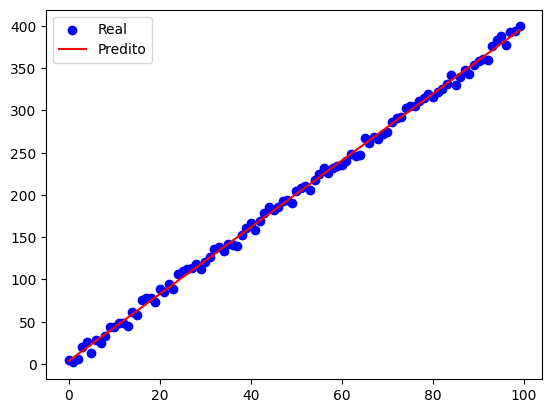

In [133]:
plt.scatter(x,y,color="blue", label="Real")
plt.plot(x,y_predito,color='red',label="Predito")
plt.legend()
plt.show()

[texto do link](https://)| **Parece que a reta aprendeu muito bem como representar os dados. Mas qual é o problema?**

In [134]:
#Podemos utilizar o mean squared error para calcular o quao errado estamos.
from sklearn.metrics import mean_squared_error

In [135]:
y_hat = linearRegression.predict(x.reshape(-1,1))

In [136]:
mean_squared_error(y,y_hat)

25.800360752788592

In [137]:
#O problema é que nosso algoritmo está observando todos os dados do nosso conjunto e isso pode fazer com que o algoritmo aprenda apenas dados do nosso conjunto.
#O melhor é separar nossos dados em uma parte para treinar o algoritmo e a outra para valiar se o algoritmo é bom ou não.
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [139]:
linearRegression2 = LinearRegression()

In [140]:
linearRegression2.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

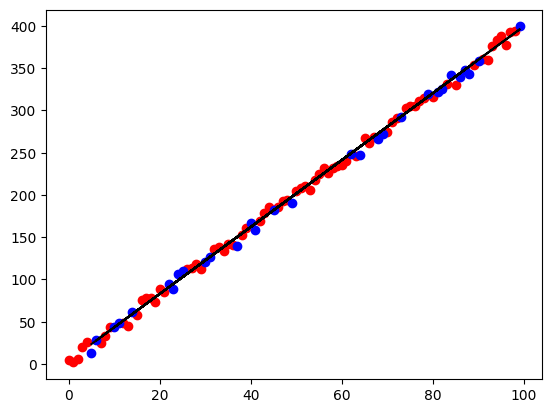

In [141]:
plt.scatter(x_train,y_train,color="red")
plt.scatter(x_test,y_test, color="blue")
plt.plot(x_test,linearRegression2.predict(x_test.reshape(-1,1)),color="Black")

# Aplicação Prática Regressão Linear

## 1 - IArpi Data Set

#### Descrição geral:
Três diferentes objetos são postos a se mover em um plano inclinado devido a ação da gravidade. Atributos cinemáticos do movimento dos corpos são coletados. Pretende-se estabelecer uma relação entre esses atributos e cada tipo de objeto.

#### Objetivo:
O problema consiste na predição da velocidade média de três objetos (esfera, cilindro e aro) a partir da sua altura inicial em um plano inclinado a um determinado ângulo. O objetivo é introduzir técnicas de IA para cursos de graduação de física onde o experimento do plano inclinado é amplamente estudado (de maneira teórica e em laboratório).


#### Features (variáveis de entrada):
As features foram determinadas experimentalmente:
- Ângulo: ângulo de inclinação do plano [°]
- Altura: de partida do objeto [m]
- Tipo de objeto (esfera, cilindro, aro)

#### Alvo (valor de saída):
- Velocidade Média: velocidade média determinada pela distância/tempo [m/s]

#### Referências:
- https://github.com/simcomat/IArpi
- Ferreira, H., Almeida Junior, E. F., Espinosa-García, W., Novais, E., Rodrigues, J. N. B., & Dalpian, G. M. (2022). Introduzindo aprendizado de máquina em cursos de física: o caso do rolamento no plano inclinado. In Revista Brasileira de Ensino de Física (Vol. 44). FapUNIFESP (SciELO). https://doi.org/10.1590/1806-9126-rbef-2022-0214

### Carregando os dados

In [142]:
tabela_dados = pd.read_csv('https://raw.githubusercontent.com/simcomat/IArpi/main/datasets/rolling.csv', sep=';')

In [143]:
tabela_dados.head()

,Objeto,Ângulo (°),Distancia (m),Altura (m),Tempo (s),Velocidade Média (m/s)
0,esfera,7.73,1.0,0.134505,1.33,0.751880
1,esfera,7.73,1.0,0.134505,1.49,0.671141
2,esfera,7.73,1.0,0.134505,1.49,0.671141
3,esfera,7.73,1.0,0.134505,1.40,0.714286
4,esfera,7.73,1.0,0.134505,1.31,0.763359


### 1 - Segundo passo: separação de dados

Os algoritmos de regressão não estão preparados para receber um nome (string) como entrada. Então, apenas fornecer o nome do objeto (esfera, cilindro, aro) para o modelo não irá funcionar. Precisamos primeiro converter esses nomes em uma representação numérica. Para isso vamos usar o **OneHot Encoding**. Nessa representação, cada valor do atributo objeto torna-se uma característica única (feature). Para 3 valores de objetos teremos 3 novas colunas com valores binários (verdadeiro ou falso, 1 ou 0) representando cada objeto, por exemplo, se seguirmos (esfera, cilindro, aro) uma esfera será representada pela tupla (1,0,0) enquanto um aro será por (0,0,1). Fisicamente, misturas não seriam possiveis como uma esfera-aro (1,0,1), mas em outras situações essa técnica pode ser usada para representar a presença de mais um objeto (como duas palavras diferentes em uma mesma frase).

In [144]:
ohe = pd.get_dummies(tabela_dados.Objeto, prefix='objeto') # One hot encoding
tabela_dados = tabela_dados.join(ohe)

In [145]:
tabela_dados.head()

,Objeto,Ângulo (°),Distancia (m),Altura (m),Tempo (s),Velocidade Média (m/s),objeto_aro,objeto_cilindro,objeto_esfera
0,esfera,7.73,1.0,0.134505,1.33,0.751880,0,0,1
1,esfera,7.73,1.0,0.134505,1.49,0.671141,0,0,1
2,esfera,7.73,1.0,0.134505,1.49,0.671141,0,0,1
3,esfera,7.73,1.0,0.134505,1.40,0.714286,0,0,1
4,esfera,7.73,1.0,0.134505,1.31,0.763359,0,0,1


In [146]:
x = tabela_dados[['Altura (m)','Ângulo (°)', 'objeto_aro', 'objeto_cilindro','objeto_esfera']]
y = tabela_dados['Velocidade Média (m/s)'] # Atributo alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### 1 - Terceiro passo: transformação dos dados

**OBS:** perceba que nem sempre a transformação ocorre apenas no terceiro passo. Tivemos que fazer uma transformação usando o One Hot Encoding (OHE) no segundo passo. A troca da ordem neste caso foi feita para facilitar a etapa de separação (não ter que filtrar a coluna objeto após transformar via OHE.

In [147]:
from sklearn.preprocessing import MinMaxScaler         # Escalonador


In [148]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Quarto passo: Treinando os algoritmos de regressão

In [149]:
from sklearn.linear_model import LinearRegression      # Regressao Linear
from sklearn.linear_model import Ridge                 # Regressão Ridge
from sklearn.cross_decomposition import PLSRegression  # Partial-least Squares (PLS)
from sklearn.neighbors import KNeighborsRegressor      # k-vizinhos mais próximos (KNN)
from sklearn.svm import SVR                            # Regressão por Máquina de Vetor Suporte
from sklearn.tree import DecisionTreeRegressor         # Regressão por Árvore de Decisão
from sklearn.ensemble import RandomForestRegressor     # RandomForest (RF)
from sklearn.ensemble import GradientBoostingRegressor # GradientBoosting (GB)
from sklearn.neural_network import MLPRegressor        # Multilayer Perceptron

# Regressao Linear
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Ridge Regression
rdg = Ridge()
rdg.fit(x_train_scaled, y_train)

# Partial least Squares PLS
pls = PLSRegression()
pls.fit(x_train_scaled, y_train)

# KNN Regressor
knnr = KNeighborsRegressor()
knnr.fit(x_train_scaled,y_train)

# SVM
svmr = SVR()
svmr.fit(x_train_scaled,y_train)

# Regressão por Árvore de Decisão
dtr = DecisionTreeRegressor()
dtr.fit(x_train_scaled,y_train)

# Regressão por RandomForest
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train_scaled, y_train)

# Regressõ por GB
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train_scaled, y_train)

# Multilayer Perceptron
mlpr =  MLPRegressor(random_state=42)
mlpr.fit(x_train_scaled,y_train)


MLPRegressor(random_state=42)

In [150]:
from sklearn.metrics import mean_absolute_error, r2_score       # Métricas de Regressão

In [151]:
y_predict = lr.predict(x_test_scaled)
print("Linear Regression MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Linear Regression MSE: 0.040 e r2_score: 0.877


In [152]:
y_predict = rdg.predict(x_test_scaled)
print("Ridge Regression MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Ridge Regression MSE: 0.033 e r2_score: 0.908


In [153]:
y_predict = pls.predict(x_test_scaled)
print("Partial least Squares PLS MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Partial least Squares PLS MSE: 0.036 e r2_score: 0.897


In [154]:
y_predict = knnr.predict(x_test_scaled)
print("KNN Regressor MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

KNN Regressor MSE: 0.015 e r2_score: 0.973


In [155]:
y_predict = svmr.predict(x_test_scaled)
print("SVM MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

SVM MSE: 0.045 e r2_score: 0.776


In [156]:
y_predict = dtr.predict(x_test_scaled)
print("Regressão por Árvore de Decisão MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Regressão por Árvore de Decisão MSE: 0.014 e r2_score: 0.975


In [157]:
y_predict = rfr.predict(x_test_scaled)
print("Regressão por RandomForest MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Regressão por RandomForest MSE: 0.014 e r2_score: 0.975


In [158]:
y_predict = gbr.predict(x_test_scaled)
print("Regressõ por GB MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Regressõ por GB MSE: 0.014 e r2_score: 0.975


In [159]:
y_predict = mlpr.predict(x_test_scaled)
print("Multilayer Perceptron MSE: {:.3f} e r2_score: {:.3f}".format(mean_absolute_error(y_predict,y_test),r2_score(y_predict,y_test)))

Multilayer Perceptron MSE: 0.028 e r2_score: 0.935


# Classificação

# Construção do dataset
Abra o browser e faça uma busca sobre a classe desejadan no site http://flickr.com

Na pagina de busca digite `<crtl>-<shift>-j` e no console cole o código abaixo
```
urls =  Array.from(document.querySelectorAll("div.photo-list-photo-container")).map(el => el.firstElementChild.src); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Salve o arquivo como csv

Caso tenha adblocker, você precisa desabilitá-lo.

Depois coloque-os na pasta sample_data

In [160]:
import shutil
shutil.rmtree("/content/sample_data/dataset", ignore_errors=True)

In [161]:
import os
import urllib.request
def download_images(main_dir,urls_filename):
    class_name = urls_filename.split('/')[-1].split('.')[0]
    print(class_name)
    output_dir = main_dir+os.sep+"dataset"+os.sep+class_name
    os.makedirs(output_dir,exist_ok=True)
    with open(urls_filename) as f:
        for url in f:
            img_filename = url.split('/')[-1].replace("\n","")
            print(img_filename)
            try:
                response = urllib.request.urlopen(url)
                open(output_dir+'/'+img_filename,mode="wb+").write(response.read())
            except:
                print('nao conseguiu baixar ',url)

In [162]:
download_images("/content/sample_data",'/content/sample_data/arara.csv')

arara
73631370_6c3c469d8c_m.jpg
5376057531_798e75a311_n.jpg
4006423058_74b13d3415_n.jpg
35020921800_984fd2ccbb_n.jpg
2847636601_041c842eb9_m.jpg
7285773660_ca4c16ebf6_m.jpg
38268490491_2ba84dcba0_n.jpg
3598900092_223f0021a2_m.jpg
4509476818_842cfb0218_m.jpg
6797351789_7660fd426e_m.jpg
3660775457_b74d707136_m.jpg
6797348139_174947efe0_m.jpg
357606546_67863f98ef_m.jpg
6797336877_dabbcaef62_m.jpg
7164573485_e377f99f48_m.jpg
4232228416_17a0e77d82_n.jpg
1474266336_067c98b955_m.jpg
6797340649_8420254266_n.jpg
3323168443_a86208217a_n.jpg
5094366215_8b679eb59b_n.jpg
16442401848_3879f536fd_m.jpg
6005020027_50cf95e1e7_m.jpg
3853007158_30f56e3d55_m.jpg
8496730838_07c9048574_m.jpg
583387417_369af84c1a_m.jpg
5737287901_700f21cf4b_m.jpg
31192972998_823ac0c0ac_m.jpg
2655778716_cdf20ef6a7_m.jpg
2037658157_f0eba8ca8c_n.jpg
3821814128_be7dab6fbe_m.jpg
15076971959_285b7eb88b_m.jpg
4231469479_d6142544de_m.jpg
4232237252_00771979ae_m.jpg
6386047741_dbbbd3b2cf_m.jpg
38575517350_1a57d973fb_m.jpg
3447689301_4

In [163]:
download_images("/content/sample_data",'/content/sample_data/tucano.csv')

tucano
4503732511_9329e85d95_m.jpg
2280622656_8dea671690_m.jpg
15974854311_52ca7f2cfa_w.jpg
5619850648_6560519185_n.jpg
5378162686_7008afd2b9_n.jpg
716037534_1977a4bba8_n.jpg
9852929393_a788b7d570_n.jpg
968574391_e2c5f854ef_n.jpg
4470447775_f52117437c_n.jpg
4650973475_25080bf859_n.jpg
3188315190_a5dd6a5c49_n.jpg
907685687_7ef5eb9067_m.jpg
3199516305_2cd448b4fb_n.jpg
8443381255_f028664c51_m.jpg
14021186023_4179af632e_n.jpg
7301247800_9166ce67d9_m.jpg
5615763075_b5720d92cd_m.jpg
5001476536_7d46f2b709_n.jpg
17082389281_1e3288c7fb_m.jpg
8097685278_7c25e53a0b_n.jpg
6863691222_d4b481548c_n.jpg
9684572100_1b9ed0cc51_n.jpg
6285900326_d208f23a97_n.jpg
36839862502_7df5955401_m.jpg
7166079529_2328d14352_m.jpg
8495627081_fff5e58fae_m.jpg
16613782554_8831a0a02c_m.jpg
16628938142_167b396a99_m.jpg
4500359614_498461920c_n.jpg
8804058166_70c28491b1_n.jpg
22306208864_4e48c3edd2_w.jpg
2975697943_5b592ba412_w.jpg
3867104715_4d795416b5_w.jpg
33060499164_14ba5ebae0_w.jpg
3465858642_081ebf4672_m.jpg
35717958

In [164]:
import torch
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [165]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((250,250)),
                                transforms.CenterCrop((227,227)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [166]:
from PIL import Image,ImageStat
def image_loader(img):
    return Image.open(img).convert("RGB")

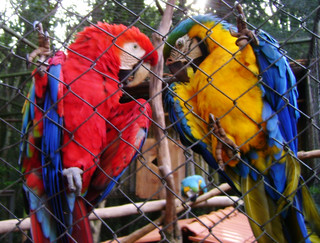

In [167]:
image_loader("/content/sample_data/dataset/arara/1033080744_36849ed58f_n.jpg")

In [168]:
dataset = torchvision.datasets.DatasetFolder('/content/sample_data/dataset',loader = image_loader,extensions='jpg',transform=transform )

In [169]:
len(dataset)

388

In [170]:
dataset.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [171]:
batch_size = 32

In [172]:
train_idx, temp_idx = train_test_split(np.arange(len(dataset)),test_size=0.3,shuffle=True,stratify=dataset.targets)
train_idx, temp_idx

(array([ 10, 288,  64,  43, 382,  17,   3, 300, 214, 290,  50, 168, 296,
        183, 249, 128, 247, 372, 364, 254, 328,  66, 330, 318, 340,  33,
        189, 186, 163, 235,   5,  59, 133,  87, 359, 152, 205, 319, 348,
        271, 368, 255, 349,  16, 201, 234, 107, 354, 281,  80, 165, 182,
        339, 170, 115, 144, 274,  56, 277, 263, 131, 301, 112, 207, 315,
        164, 224, 208, 130, 325, 298, 370,   1, 231, 229, 227, 202,  60,
        134,  73, 369, 358, 336, 373, 324, 294, 371, 278, 109, 100, 248,
        273, 314, 295,  52, 195, 243, 181, 110,  31, 351, 116,  58, 329,
         96,  18, 217, 148, 352, 284, 151, 119,  68, 283, 111, 279, 145,
        225, 258, 174, 185,  11, 226, 154, 219, 150,  30, 101, 297, 212,
        343, 386,  82,  88, 113, 166,  21, 299,  74, 118, 331, 264, 245,
        140, 180, 216,   9, 124, 233, 127, 176, 257, 175, 209,  27,  53,
        230, 147, 220,  75, 198, 291,   2, 120,  62,  57, 380, 190, 197,
         29, 125, 160,  71, 232, 326, 322,  98,  26

In [173]:
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=np.array(dataset.targets)[temp_idx])
valid_idx, test_idx

(array([350, 215, 158, 355, 142,  46, 304,  63, 102, 327, 276, 272, 132,
        381, 117, 238, 139, 236, 377,  94,  20, 206,  83, 114,  85,  48,
        239,  34,   7,  55,  84, 383, 188, 367, 146, 323,  99,  19, 285,
        167, 211, 316,  14, 292, 379, 178, 287, 260,  90, 153, 149, 275,
        320, 246, 199, 347, 223, 137]),
 array([108,  97, 193, 126, 345, 194, 308, 342, 161,  37, 268,  15,  47,
        253, 250, 213, 334, 138, 312, 135,  54, 177,  35, 387,  70, 256,
        332, 237,  89, 363, 302, 344,  22, 173,  32, 251, 157, 192, 341,
         92, 261, 244, 106, 353, 309,  41,  93,  77, 313, 305,  49,  38,
        335, 103, 228, 376, 187, 384, 204]))

In [174]:
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)

In [175]:
dl_train = torch.utils.data.DataLoader(dataset,batch_size=batch_size,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(dataset,batch_size=batch_size,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(dataset,batch_size=batch_size,sampler=test_sampler)

In [176]:
x,y = next(iter(dl_train))

In [177]:
x.shape,y.shape

(torch.Size([32, 3, 227, 227]), torch.Size([32]))

In [178]:
device

device(type='cuda', index=0)

In [179]:
import torchvision.models as models
model = models.mobilenet_v3_small(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 67.3MB/s]


In [180]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [181]:
import torch.nn as nn
model.classifier[3] = nn.Linear(1024,2)

## Treinando a rede com os novos nós de saída

In [182]:
import torch.nn as nn
from torch import optim
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.1)

In [184]:
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [185]:
loss_train = []
loss_eval  = []
patience_time = 15
epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model)
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    #wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval
        last_best_result = 0
        print("Best model found! saving...")
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model found! saving...
epoch 0 loss_train 0.288 loss_eval 0.082 last_best 1
epoch 1 loss_train 0.045 loss_eval 0.089 last_best 2
Best model found! saving...
epoch 2 loss_train 0.023 loss_eval 0.061 last_best 1
Best model found! saving...
epoch 3 loss_train 0.011 loss_eval 0.060 last_best 1
Best model found! saving...
epoch 4 loss_train 0.008 loss_eval 0.046 last_best 1
epoch 5 loss_train 0.007 loss_eval 0.065 last_best 2
epoch 6 loss_train 0.009 loss_eval 0.064 last_best 3
Best model found! saving...
epoch 7 loss_train 0.031 loss_eval 0.041 last_best 1
Best model found! saving...
epoch 8 loss_train 0.008 loss_eval 0.029 last_best 1
epoch 9 loss_train 0.005 loss_eval 0.037 last_best 2
epoch 10 loss_train 0.003 loss_eval 0.039 last_best 3
epoch 11 loss_train 0.005 loss_eval 0.033 last_best 4
epoch 12 loss_train 0.002 loss_eval 0.030 last_best 5
epoch 13 loss_train 0.002 loss_eval 0.031 last_best 6
epoch 14 loss_train 0.003 loss_eval 0.035 last_best 7
Best model found! saving...
epoc

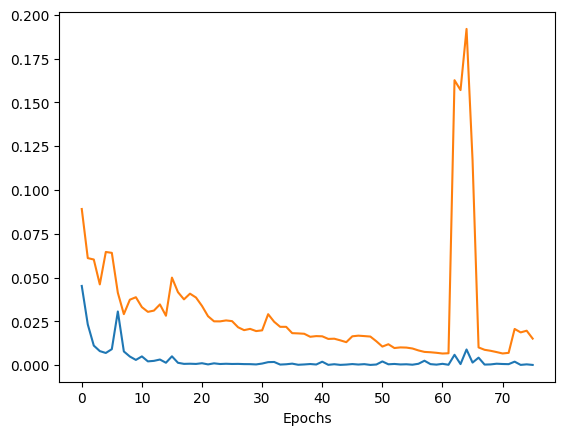

In [186]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [188]:
img = image_loader("/content/sample_data/dataset/arara/14115783680_86010ce79c_m.jpg")

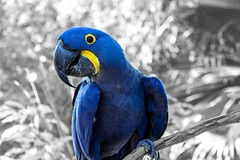

In [189]:
img

In [194]:
x = transform(img)
x = x.view(1,3,227,227)

x = x.to(device)
model.eval()
pred = model(x).squeeze(0).softmax(0)

In [205]:
label = ["Arara","Tucano"]

In [206]:
predict_label = label[pred.argmax().item()]
predict_label

'Arara'

### Exemplo nunca visto

In [207]:
img = image_loader("/content/arara_teste.jpg")

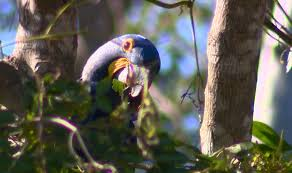

In [208]:
img

In [211]:
x = transform(img)
x = x.view(1,3,227,227)

x = x.to(device)
model.eval()
pred = model(x).squeeze(0).softmax(0)
pred

tensor([0.8220, 0.1780], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [210]:
predict_label = label[pred.argmax().item()]
predict_label

'Arara'